Spectral Embedding
===

* *0:00 min* | Última modificación: Septiembre 21, 2021 | YouTube

Este es un embedding no lineal que encuentra una representación de baja dimensionalidad realizando la descomposición espectral de la gráfica. El algoritmo se basa en la minimización de una función de costo basad en la gráfica, por lo que asegura que los ejemplos cercanos en los datos originales, son mapeados a puntos cercanos en el espacio embebido.

La descripción general del algoritmo es la siguiente:


* Los patrones están organizados en una tabla donde las filas representan los puntos y las columnas represesntan las dimensiones.


* Se transforman los datos a una matriz de afinidad que represnta la similitud entre los puntos. Esta afinidad es medida usualmente usando un kernel (por ejemplo, el gaussiano). La metodología KDE usa este mismo concepto.  La matriz de afinidad tiene una representación de red donde los nodos son los ejemplos y las líneas indican similitud entre puntos.


* Se construye la matriz de grado, la cual es una matriz diagonal, donde los elementos de dicha diagonal represntan la cantidad de vertices que tiene cada nodo.


* Se contruye la gráfica Laplaciana para el caso no normalizado $L = D - A$ o no normalizado $L=D^{-1/2}(D-A)D^{-1/2}$


* Se realiza la descomposición de la matriz laplaciana en valores propios.

![spectral_clustering.png](assets/spectral_clustering.png)

https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

Cada dígito está representado por una matriz de 8 x 8 pixels.

In [1]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6, return_X_y=False)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

![digits_dataset.png](assets/digits_dataset.png)

In [2]:
import numpy as np
from sklearn.manifold import SpectralEmbedding

spectralEmbedding = SpectralEmbedding(
    # -----------------------------------------------------
    # The dimension of the projected subspace.
    n_components=2,
    # -----------------------------------------------------
    # How to construct the affinity matrix
    #   ‘nearest_neighbors’ : construct the affinity matrix
    #      by computing a graph of nearest neighbors.
    #   ‘rbf’ : construct the affinity matrix by computing
    #      a radial basis function (RBF) kernel.
    #   ‘precomputed’ : interpret X as a precomputed
    #      affinity matrix.
    #   ‘precomputed_nearest_neighbors’ : interpret X as a
    #      sparse graph of precomputed nearest neighbors,
    #      and constructs the affinity matrix by selecting
    #      the n_neighbors nearest neighbors.
    affinity="nearest_neighbors",
    # -----------------------------------------------------
    # Number of nearest neighbors for nearest_neighbors graph building.
    n_neighbors=None,
)

#
# Despues de entrenado, el objeto tiene los siguientes atributos:
#   embedding_
#   affinity_matrix_
#   n_neighbors_
#

X_projected = spectralEmbedding.fit_transform(X)

x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
X_scaled = (X_projected - x_min) / (x_max - x_min)

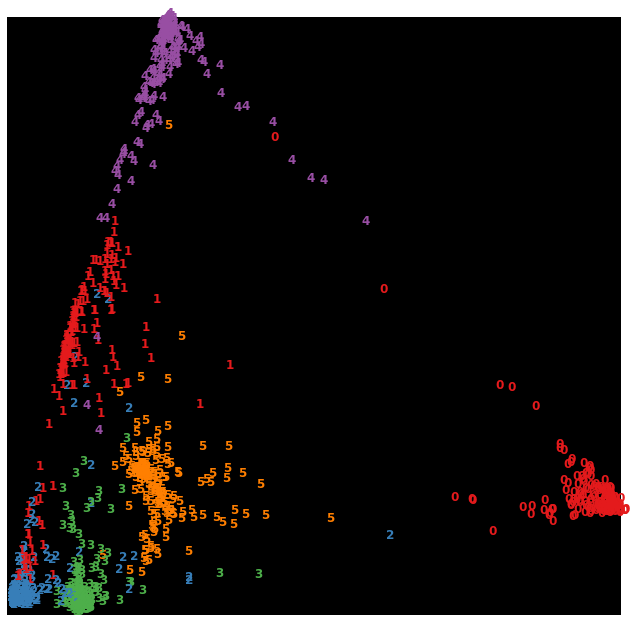

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 11))
plt.style.use("dark_background")

for i in range(X_scaled.shape[0]):

    plt.text(
        X_scaled[i, 0],
        X_scaled[i, 1],
        str(y[i]),
        color=plt.cm.Set1(y[i] / 10.0),
        fontdict={"weight": "bold", "size": 12},
    )

plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.show()